In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
df = pd.read_csv('../data/raw/application_train.csv')

In [7]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Ver o tamanho do dataset (linhas, colunas)
print(f"O dataset possui {df.shape[0]} linhas (clientes) e {df.shape[1]} colunas (features).\n")

O dataset possui 307511 linhas (clientes) e 122 colunas (features).



In [13]:
# Contar os valores da coluna TARGET
target_counts = df['TARGET'].value_counts()
print(target_counts)

TARGET
0    282686
1     24825
Name: count, dtype: int64


Adimplentes   (0): 91.93%
Inadimplentes (1):8.07%


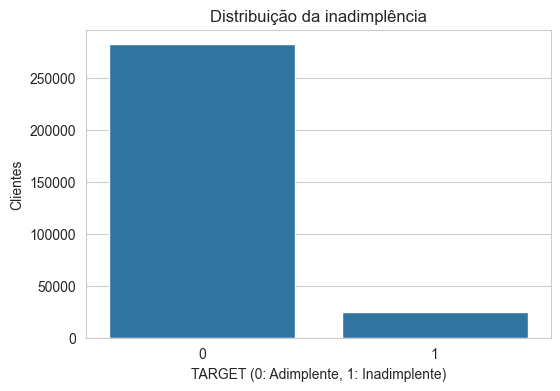

In [14]:
# percentual da proporção

target_percent = df['TARGET'].value_counts(normalize=True) * 100
print(f"Adimplentes   (0): {target_percent[0]:.2f}%")
print(f"Inadimplentes (1):{target_percent[1]:.2f}%")

#Grafico para visualizar a distribuição

plt.figure(figsize=(6,4))
sns.countplot(x='TARGET' , data=df)
plt.title("Distribuição da inadimplência")
plt.ylabel("Clientes")
plt.xlabel("TARGET (0: Adimplente, 1: Inadimplente)")
plt.show()

In [15]:
# calculando os dados faltantes

def calcular_dados_faltantes(dataframe):
    total_faltantes = dataframe.isnull().sum().sort_values(ascending=False)
    percentual_faltantes = ((dataframe.isnull().sum() / len(dataframe)) * 100).sort_values(ascending=False)

    #criando uma tabela com as duas informações
    tabela_faltantes = pd.concat([total_faltantes, percentual_faltantes], axis=1, keys=['Total', 'Porcentagem (%)'])
    
    # Retornar apenas as colunas que de fato têm dados faltantes
    return tabela_faltantes[tabela_faltantes['Total'] > 0]

# Chamar a função e exibir as 20 colunas com mais dados faltantes
dados_faltantes_df = calcular_dados_faltantes(df)
print("Top 20 colunas com dados faltantes:")
dados_faltantes_df.head(20)
    

Top 20 colunas com dados faltantes:


,Total,Porcentagem (%)
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [16]:
# Contar quantos tipos de dados diferentes existem
print("Contagem de tipos de dados nas colunas:")
print(df.dtypes.value_counts())

# Vamos ver as colunas categóricas (tipo 'object') e quantos valores únicos cada uma tem
colunas_categoricas = df.select_dtypes('object')
print(f"\nO dataset possui {colunas_categoricas.shape[1]} colunas categóricas.")

# Contar categorias únicas em cada coluna categórica
print("\nNúmero de categorias únicas por coluna categórica:")
colunas_categoricas.nunique().sort_values(ascending=False)

Contagem de tipos de dados nas colunas:
float64    65
int64      41
object     16
Name: count, dtype: int64

O dataset possui 16 colunas categóricas.

Número de categorias únicas por coluna categórica:


ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
CODE_GENDER                    3
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64

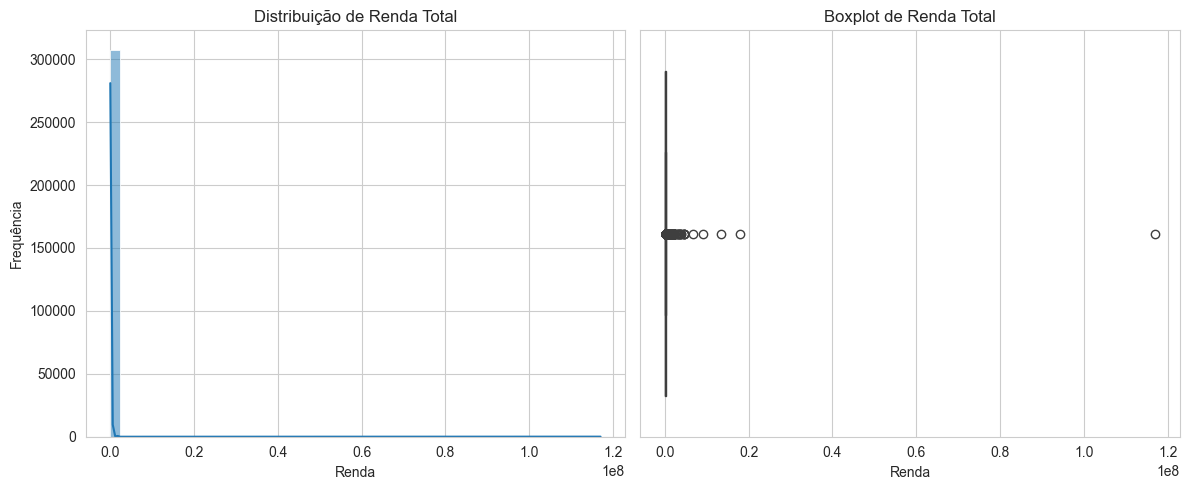

In [17]:
#Distribuição de renda

plt.figure(figsize=(12,5))

#Histograma

plt.subplot(1,2,1)
sns.histplot(df['AMT_INCOME_TOTAL'] , bins=50, kde=True)
plt.title('Distribuição de Renda Total')
plt.xlabel('Renda')
plt.ylabel('Frequência')

#Busca de outliers

plt.subplot(1,2,2)
sns.boxplot(x=df['AMT_INCOME_TOTAL'])
plt.title('Boxplot de Renda Total')
plt.xlabel('Renda')

plt.tight_layout()
plt.show()


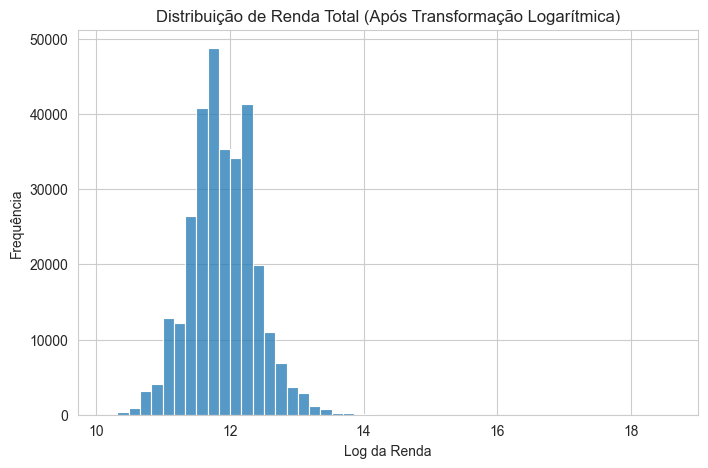

In [20]:
# Usamos np.log1p, que calcula log(1 + x) para lidar com possíveis valores de renda zero de forma segura.
df['AMT_INCOME_TOTAL_LOG'] = np.log1p(df['AMT_INCOME_TOTAL'])

# Agora, vamos plotar o histograma da nova coluna
plt.figure(figsize=(8, 5))
sns.histplot(df['AMT_INCOME_TOTAL_LOG'], bins=50)
plt.title('Distribuição de Renda Total (Após Transformação Logarítmica)')
plt.xlabel('Log da Renda')
plt.ylabel('Frequência')
plt.show()

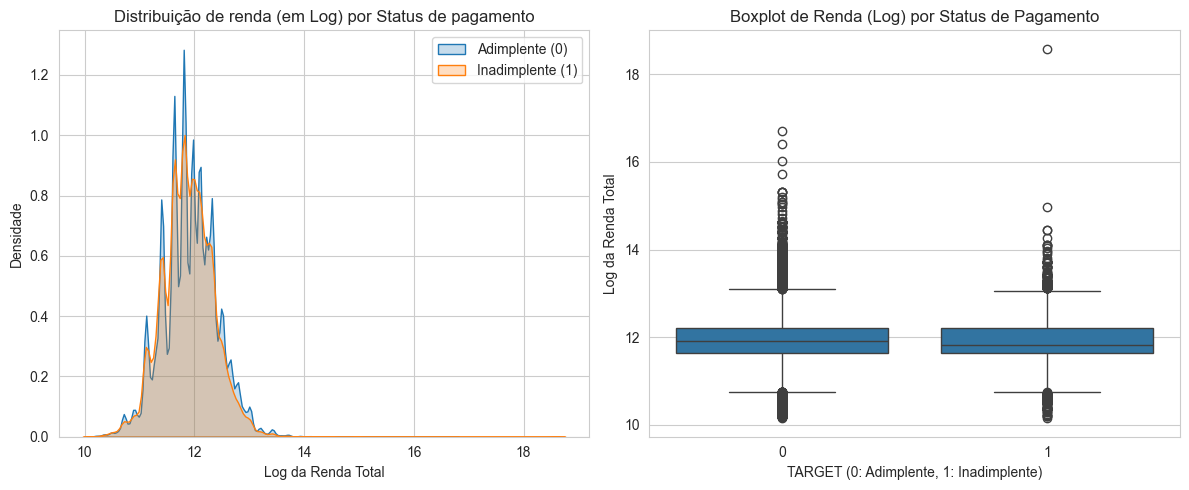

In [23]:
plt.figure(figsize=(12,5))

#grafico de densidade para comparar as distribuições

plt.subplot(1,2,1)
sns.kdeplot(df.loc[df['TARGET'] == 0 , 'AMT_INCOME_TOTAL_LOG'] , label= 'Adimplente (0)', fill=True)
sns.kdeplot(df.loc[df['TARGET'] == 1 , 'AMT_INCOME_TOTAL_LOG'] , label= 'Inadimplente (1)', fill=True)
plt.title('Distribuição de renda (em Log) por Status de pagamento')
plt.xlabel('Log da Renda Total')
plt.ylabel('Densidade')
plt.legend()

# Boxplot para comparar as medianas e quartis
plt.subplot(1, 2, 2)
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL_LOG', data=df)
plt.title('Boxplot de Renda (Log) por Status de Pagamento')
plt.xlabel('TARGET (0: Adimplente, 1: Inadimplente)')
plt.ylabel('Log da Renda Total')

plt.tight_layout()
plt.show()






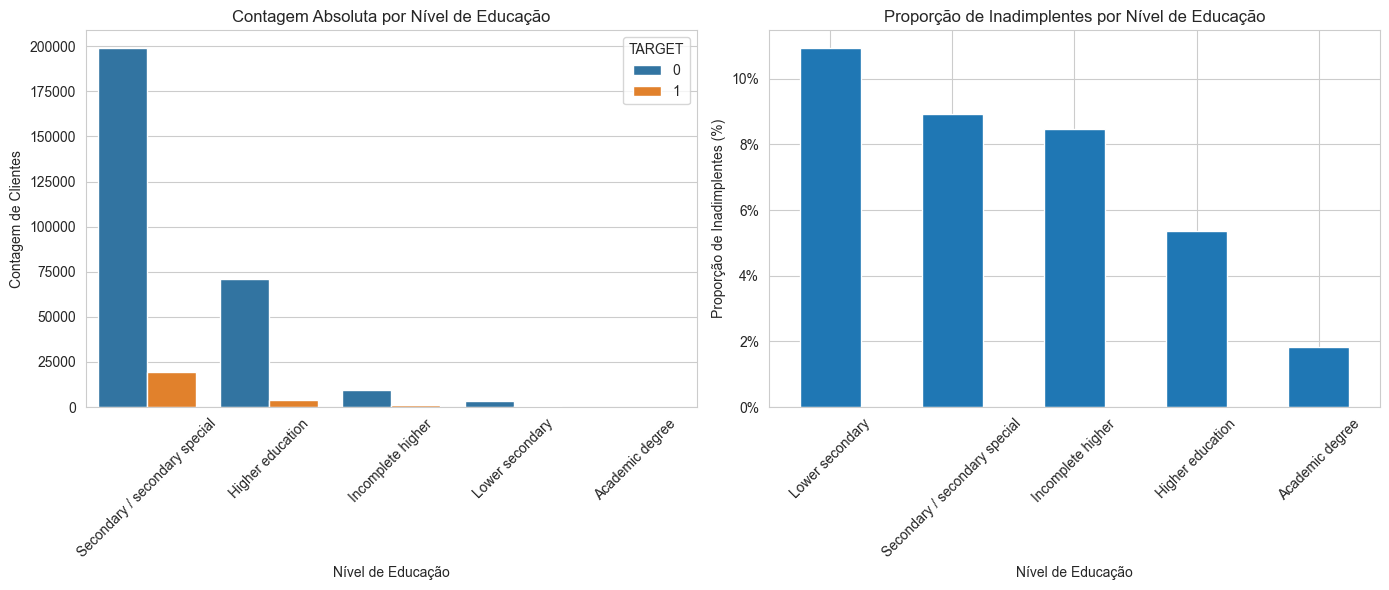

In [24]:
plt.figure(figsize=(14, 6))

# Gráfico 1: Contagem Absoluta
plt.subplot(1, 2, 1)
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=df, order=df['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('Contagem Absoluta por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem de Clientes')
plt.xticks(rotation=45)

# Gráfico 2: Proporção (Porcentagem)
# Calculando a proporção de inadimplentes para cada categoria
prop_df = df.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts(normalize=True).unstack()
prop_df = prop_df.sort_values(by=1, ascending=False) # Ordena pela proporção de inadimplentes

plt.subplot(1, 2, 2)
prop_df[1].plot(kind='bar') # Plota apenas a barra de inadimplentes (TARGET=1)
plt.title('Proporção de Inadimplentes por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Proporção de Inadimplentes (%)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter('{:.0%}'.format) # Formata o eixo Y para porcentagem

plt.tight_layout()
plt.show()

In [25]:
# Ver as categorias de gênero e a contagem de cada uma
print(df['CODE_GENDER'].value_counts())

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


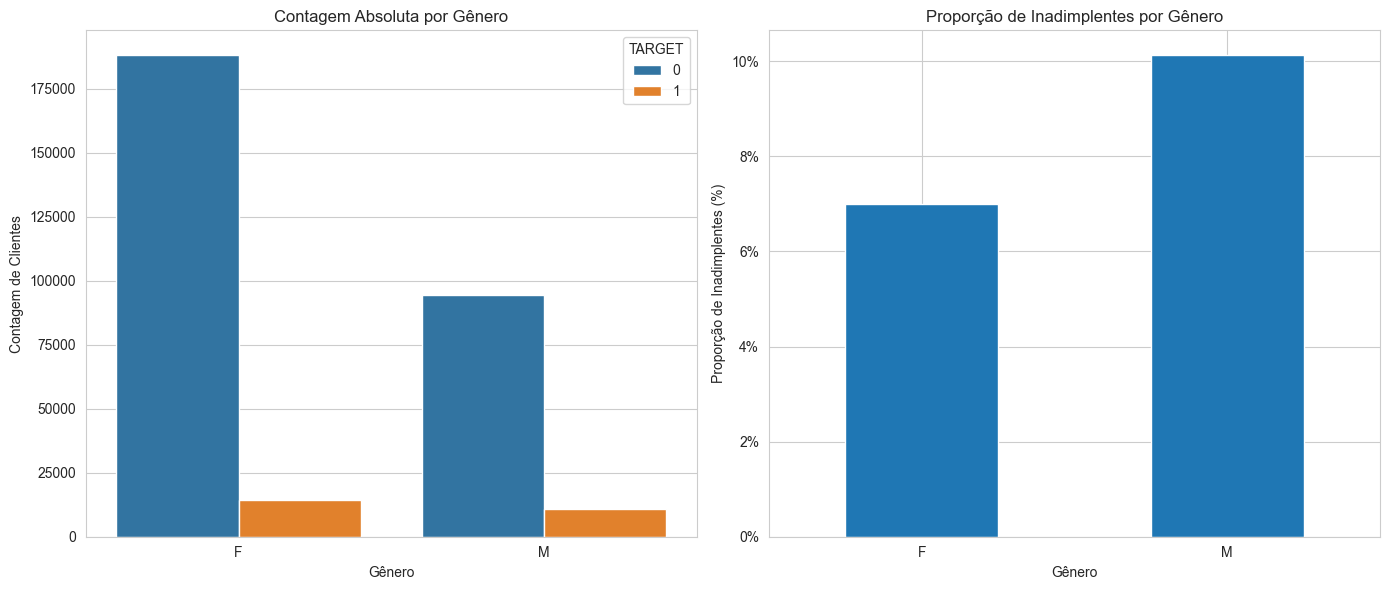

Proporção de Inadimplentes:
Feminino (F): 7.00%
Masculino (M): 10.14%


In [27]:
# Vamos primeiro filtrar os valores 'XNA' para focar a análise nos dois gêneros principais
df_gender = df[df['CODE_GENDER'] != 'XNA']

plt.figure(figsize=(14, 6))

# Gráfico 1: Contagem Absoluta
plt.subplot(1, 2, 1)
sns.countplot(x='CODE_GENDER', hue='TARGET', data=df_gender, order=['F', 'M'])
plt.title('Contagem Absoluta por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem de Clientes')

# Gráfico 2: Proporção (Porcentagem)
prop_df_gender = df_gender.groupby('CODE_GENDER')['TARGET'].value_counts(normalize=True).unstack()

plt.subplot(1, 2, 2)
prop_df_gender[1].plot(kind='bar')
plt.title('Proporção de Inadimplentes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Proporção de Inadimplentes (%)')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter('{:.0%}'.format) # Formata o eixo Y para porcentagem

plt.tight_layout()
plt.show()

# Imprimir os valores exatos da proporção
print("Proporção de Inadimplentes:")
print(f"Feminino (F): {prop_df_gender.loc['F', 1]:.2%}")
print(f"Masculino (M): {prop_df_gender.loc['M', 1]:.2%}")
